In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
#importing the datasheet for this case!
data_=pd.read_csv('NewspaperData.csv')

In [64]:
#EDA phase

In [65]:
data_.shape

(34, 3)

In [66]:
data_.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


In [6]:
data_.describe()

,daily,sunday
count,34.000000,34.000000
mean,430.962471,591.202412
std,269.211470,376.418051
min,133.239000,202.614000
25%,233.021500,327.769500
50%,355.235500,436.712500
75%,516.616500,699.735250
max,1209.225000,1762.015000


In [7]:
data_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 744.0+ bytes


In [8]:
data_.corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


In [ ]:
#Visualisation Phase

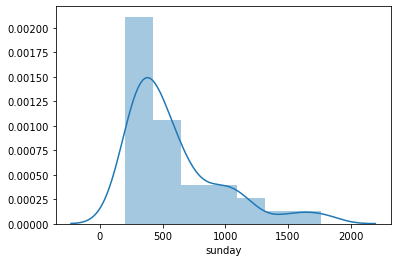

In [30]:
sns.distplot(data_['sunday'])

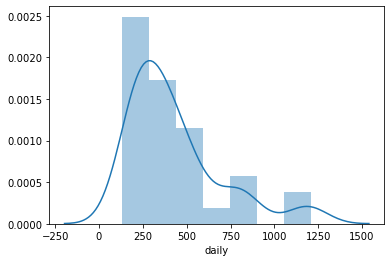

In [10]:
sns.distplot(data_['daily'])

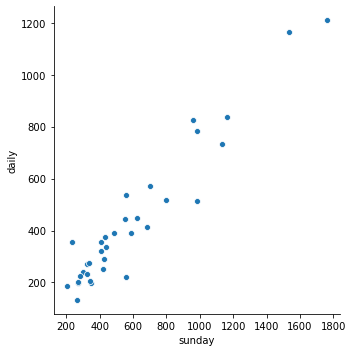

In [14]:
sns.relplot(x='sunday',y='daily',data=data_)

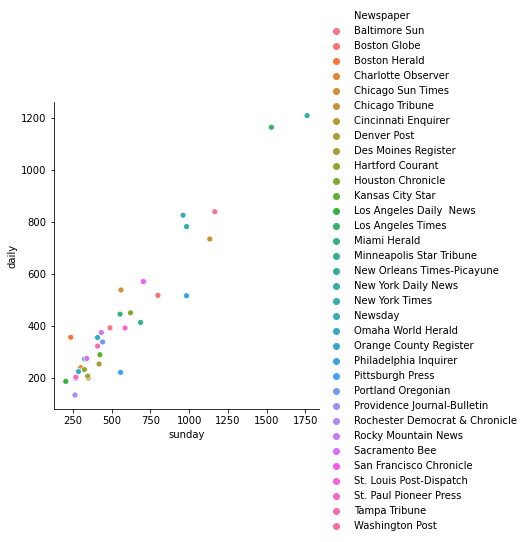

In [37]:
a=sns.relplot(x='sunday',y='daily',hue='Newspaper',data=data_)

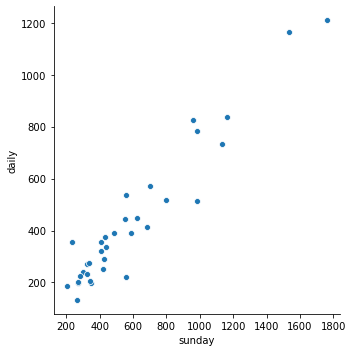

In [19]:
a=sns.relplot(x='sunday',y='daily',data=data_)

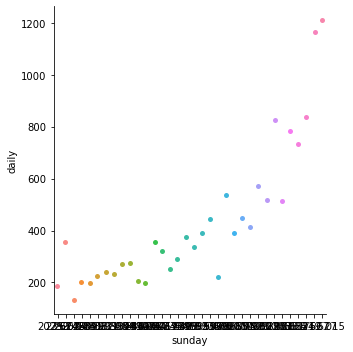

In [18]:
sns.catplot(x='sunday',y='daily',data=data_)

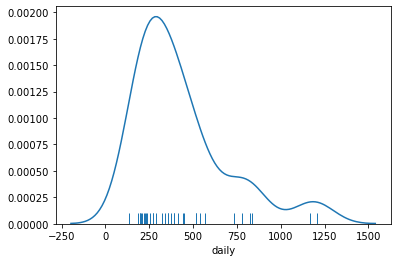

In [50]:
sns.distplot(data_['daily'], hist=False, rug=True)

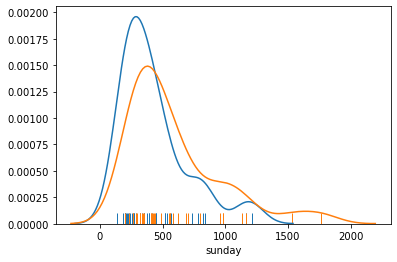

In [83]:
sns.distplot(data_['daily'], hist=False, rug=True)
sns.distplot(data_['sunday'], hist=False, rug=True)


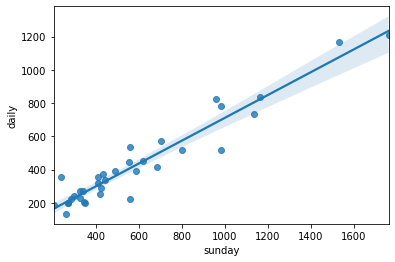

In [55]:
sns.regplot(x='sunday',y='daily',data=data_)

In [ ]:
#model building phase, using statmodels for Ordianry Least Square(OLS) method

In [56]:
import statsmodels.formula.api as smf 

In [59]:
model=smf.ols('sunday~daily',data=data_).fit()

In [ ]:
#from statmodels library OLS is used where in the syntax its important to give the dependent variable first and 
#fit is used to fit and execcute all the code, it executes ols method and compute the output

In [60]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 sunday   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     358.5
Date:                Thu, 10 Dec 2020   Prob (F-statistic):           6.02e-19
Time:                        10:02:40   Log-Likelihood:                -206.85
No. Observations:                  34   AIC:                             417.7
Df Residuals:                      32   BIC:                             420.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.8356     35.804      0.386      0.702     -59.095      86.766
daily          1.3397      0.071     18.935      0.000       1.196       1.484
==============================================================================
Omnibus:                        3.297   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.192   Jarque-Bera (JB):                1.990
Skew:                           0.396   Prob(JB):                        0.370
Kurtosis:                       3.882   Cond. No.                         965.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
model.params

Intercept    13.835630
daily         1.339715
dtype: float64

In [ ]:
#y=B0+B1x here B0 is the intercept and B1 is daily

In [72]:
print(model.tvalues,'\n' ,model.pvalues)

Intercept     0.386427
daily        18.934840
dtype: float64 
 Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64


In [73]:
#r square value 


(0.9180596895873295, 0.9154990548869336)

In [77]:
#Predict for new data point
newdata=pd.Series([200,300,450])

In [86]:
data_pred= pd.DataFrame(newdata,columns=[ 'daily'])

In [88]:
data_pred_1=pd.DataFrame({'day':[500,400,250,900]})
data_pred_1

,day
0,500
1,400
2,250
3,900


In [80]:
model.predict(data_pred)

0    281.778581
1    415.750057
2    616.707271
dtype: float64